## Исследование данных о российском кинопрокате


**Нужно изучить рынок российского кинопроката и выявить текущие тренды. Важно уделить внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.**


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

data1 = pd.read_csv('/datasets/mkrf_movies.csv')
data2 = pd.read_csv('/datasets/mkrf_shows.csv')

data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


    Описание данных
    Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
    title — название фильма;
    puNumber — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    type — тип фильма;
    film_studio — студия-производитель;
    production_country — страна-производитель;
    director — режиссёр;
    producer — продюсер;
    age_restriction — возрастная категория;
    refundable_support — объём возвратных средств государственной поддержки;
    nonrefundable_support — объём невозвратных средств государственной поддержки;
    financing_source — источник государственного финансирования;
    budget — общий бюджет фильма;
    ratings — рейтинг фильма на КиноПоиске;
    genres — жанр фильма.
    столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.


In [2]:
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


    Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
    puNumber — номер прокатного удостоверения;
    box_office — сборы в рублях.

In [3]:
#в первом датасете столбец 'puNumber' имеет тип object, приведем к числовому типу данных.
data1.puNumber = pd.to_numeric(data1.puNumber, errors='coerce')
data1.info()
data1[data1['puNumber'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#в одной строке нет данных о прокатном удостоверении, а также о показателях фильма 
#данную строку удалим, оставшиеся данные приведем к типу int
data1.dropna(subset=['puNumber'], inplace=True)
data1.puNumber = data1.puNumber.astype('int')

In [5]:
#обьединим датафреймы по столбцу puNumber используя индекс датафрейма data1
data = data1.merge(data2, how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

In [6]:
#Переименуем столбец 'puNumber'
data.rename(columns={'puNumber': 'pu_number'}, inplace=True)
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

    1. type исправить неявные дубликаты в ' Художественный' и ' Анимационный' 
    2. привести данные из столбца age_restriction к виду 0, 6, 12, 16, 18

In [7]:
#show_start_date перевести в формат datetime 
data.show_start_date = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%d')

In [8]:
#приведем все данные к нижнему регистру
data = data.applymap(lambda x:x.lower() if type(x) == str else x) 
data.sample(7)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3514,взломать блогеров,111016616,2016-10-28 12:00:00+00:00,художественный,"ооо ""таббак""",россия,м.свешников,т.бекмамбетов,«6+» - для детей старше 6 лет,0.0,25000000.0,36016269.0,фонд кино,1.0,"комедия,мультфильм,фантастика",7323648.0
5289,ева: искусственный разум,121023911,2011-12-19 12:00:00+00:00,художественный,"эскандало фильм, рэн интертейнмент",испания - франция,кике майло,сержи касамитьяна,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"фантастика,фэнтези,драма",NaN
5999,париж. город zомби,121013818,2018-07-05 12:00:00+00:00,художественный,"от э кут, канал +, сине +, национальный центр ...",франция,доминик роше,"симон арналь, каролин беньо, джули билли, каро...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.8,"ужасы,триллер,драма",2597359.0
3851,шерлок холмс,221043410,2010-03-29 12:00:00+00:00,художественный,"лин пикчерз, сильвер пикчерз, виладж роадшоу п...",сша-германия,гай ричи,"сьюзан доуни, дэн лин, джоел сильвер, лайонел ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.1,"боевик,приключения,триллер",NaN
74,борец и клоун,111012013,2013-12-19 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,"к.юдин, б.барнет",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.1,"драма,спорт",NaN
4254,"око за око (по мотивам повести б.лавренева ""се...",111007810,2010-08-23 12:00:00+00:00,художественный,"ооо ""кинокомпания ""покровские ворота"" совместн...",россия,г.полока,"р.шарабидзе, и.поршнев",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,10685.0
160,егор булычев и другие,111011314,2014-10-01 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,с.соловьев,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,драма,NaN


In [9]:
#создадим функцию, которая сможет найти в тексте число и вывести его как целочисленное значение
import re
def restriction_to_int (row):
    restirction = row.age_restriction
    to_int = re.search ('(?<=«)\d+', restirction)
    return int(to_int.group(0))

In [10]:
#создадим столбец с числовым выражением ограничения по возрасту
data['restriction_int'] = data.apply(restriction_to_int, axis=1)
data.restriction_int.value_counts()

16    2851
18    1605
12    1592
0      811
6      626
Name: restriction_int, dtype: int64

In [11]:
data[data['ratings'].notna()]['ratings'].sort_values()

3514    1.0
4677    1.1
1535    1.1
4793    1.2
4013    1.3
       ... 
6736    98%
1804    99%
259     99%
1341    99%
6881    99%
Name: ratings, Length: 6519, dtype: object

In [12]:
data.iloc[1341]

title                              сказка о добре и вре
pu_number                                     111008913
show_start_date               2013-11-15 12:00:00+00:00
type                                     художественный
film_studio              нп "студия игрового кино "лик"
production_country                               россия
director                                      е.шиляева
producer                                    к.терещенко
age_restriction           «6+» - для детей старше 6 лет
refundable_support                                  NaN
nonrefundable_support                               NaN
budget                                              NaN
financing_source                                    NaN
ratings                                             99%
genres                           триллер,драма,детектив
box_office                                          NaN
restriction_int                                       6
Name: 1341, dtype: object

   **В столбце ratings есть значения, которые не соответствуют рейтингу кинопоиска, это фильмы которые не имели рейтинга на момент формирования датасета, либо не прокатывались, либо не имеют до сих пор.** 
   
   **Эти значение необходимо убрать из датафрейма**

In [13]:
data.ratings = pd.to_numeric(data.ratings, errors='coerce')

In [14]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,restriction_int
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18


**Мы потеряли 29 значений в толбце ratings, это не повлияет на качество исследования**

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [15]:
#Проанализируем столбец с источником финансирования
#Поскольку данные об источниках указаны только для фильмов с господдержкой, остальные заполним как 'другое'
data.financing_source.value_counts()
data.financing_source.fillna('другое', inplace=True) 

In [16]:
#в production_country есть 2 пропущенных значения, ералаш и мульт личности, прокатстартовал в 2010 году и в 2016 году, соответственно можем предположить, что страна производства Россия
data.production_country = data.production_country.fillna('россия')

In [17]:
#Рассмотрим пропуски в film_studio
#Данные фильмы не имеют данных о прокате, сборах и сумме поддержки от государства
#Предполагаю, что это эфирные ТВ-шоу которые распространались не по подписке и не имеют важности в нашем исследовании.
#Доля пропусков составляет 0,2%, предлагаю их удалить.
print(f"Доля пропусков составляет {data.film_studio.isna().sum() / data.film_studio.count()}")
data.dropna(subset=['film_studio'], inplace=True)

Доля пропусков составляет 0.0024106066693451184


Данные из director producer refundable_support nonrefundable_support budget ratings genres box_office предлагаю оставить без изменений.

box office мы не трогаем, так как только эти значения есть только для фильмов, информация о прокатных удостоверениях которыхсодержалась во второй таблице.

refundable_support nonrefundable_support budget financing_source указаны только для фильмов с поддержкой, о чем говорит нам описание датасета. следовательно данные в этих столбцах полны


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [18]:
data[data.duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,restriction_int


Явных дубликатов в таблице нет. 

In [19]:
#Взглянем на дубликаты в столбце pu_number
data[data.pu_number.duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,restriction_int
4638,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00+00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,другое,7.6,"драма,мелодрама,история",NaN,16
5067,анализируй то!,221054410,2010-05-25 12:00:00+00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,другое,6.8,"комедия,криминал",NaN,12


Как мы видим, есть 2 фильма, по которым выдавалось одновременно одно прокатное удостоверение, не знаю насколько это попадает под нормативно правовую базу, но в датасете скачанном с сайта минкульта все также, оставим как есть.

In [20]:
data[data.title.duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,restriction_int
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,другое,6.8,"фантастика,боевик,триллер",NaN,18
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,другое,6.8,"фантастика,боевик,триллер",NaN,18
41,алекс и эмма,221004616,2016-02-09 12:00:00+00:00,художественный,"эскейп артистс, франчайз пикчерз, рейнер-грэйс...",сша,роб райнер,"тодд блэк, элан грейсман, джереми левен, роб р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,другое,6.4,"мелодрама,комедия",NaN,16
110,гарри поттер и орден феникса /по роману дж.к.р...,121026316,2016-09-23 12:00:00+00:00,художественный,"уорнер бразерс, хэйдей филмз",сша - великобритания,дэвид йетс,"дэйвид баррон, дэйвид хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,другое,7.7,"фэнтези,приключения,семейный",759526.00,16
113,гарри поттер и узник азкабана /по роману дж.к....,121026116,2016-09-23 12:00:00+00:00,художественный,"хэйдей филмз, 1492 пикчерз, уорнер бразерс",сша,альфонсо куарон,майкл барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,другое,8.2,"фэнтези,приключения,семейный",1125302.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,невиновен,111019319,2019-11-07 12:00:00+00:00,художественный,"ооо ""кавказфильм""",россия,а.емкужев,"а.емкужев, а.хуажева, ооо ""корпорация русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,другое,7.5,"триллер,детектив,криминал",NaN,16
7415,"отель ""гранд будапешт""",121035119,2019-12-13 12:00:00+00:00,художественный,"американ эмпирикал, индиан пэинтбраш, скотт ру...","германия, сша",уэс андерсен,"уэс андерсон, джереми доусон, стивен рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,другое,7.9,"комедия,приключения,детектив",NaN,16
7437,зверь,121035919,2019-12-05 12:00:00+00:00,художественный,студио энд нью,южная корея,ли джон-хо,"чан гён-ик, чон джи-хун, пэк кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,другое,6.5,"триллер,драма",175003.51,18
7449,в тихом омуте,121036919,2019-12-09 12:00:00+00:00,художественный,"хэд гир филмз, крео филмз, локал хироу, метрол...",сша,адам рэндолл,мэтт уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,другое,6.8,"триллер,криминал,детектив",NaN,18


в title дубликаты связаны с тем, что фильмам выдается несколько прокатных удостоверений для показа в кинотеатрах, тв, стриминге.

title является для нас основным идентификатором

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [21]:
data.type = data.type.str.strip()
data.type.value_counts()

художественный                5901
анимационный                   829
прочие                         406
документальный                 280
научно-популярный               50
музыкально-развлекательный       1
Name: type, dtype: int64

In [22]:
#в production_country есть строки с разными разделителями, ',', ' - ', заменим на ','
data.production_country.value_counts()

сша                                                                                         2172
россия                                                                                      1805
ссср                                                                                         347
франция                                                                                      301
великобритания                                                                               257
                                                                                            ... 
испания - сша - колумбия                                                                       1
ливан-сша                                                                                      1
дания - швеция - великобритания - франция - германия - нидерланды - норвегия - финляндия       1
аргентина - франция - испания                                                                  1
оаэ - сша                     

In [23]:
data.director.value_counts()

о.семёнова          47
д.червяцов          17
стивен содерберг    17
ридли скотт         16
тиль швайгер        14
                    ..
бландин ленуар       1
аннабель арден       1
дэнни кэннон         1
р.верещак            1
итан коэн            1
Name: director, Length: 4792, dtype: int64

In [24]:
data.producer.value_counts()

п.смирнов                                                                                        67
олег кузовков, дмитрий ловейко, марина ратина                                                    28
с.сельянов                                                                                       18
д.ловейко, о.кузовков                                                                            17
джерри брукхаймер                                                                                11
                                                                                                 ..
лукас линетт-креч                                                                                 1
т.цыварева, а.златопольский, в.воля, е.головин, а.сметанкин, с.сельянов, а.боярский, м.меннис     1
к.мелик-авакян, л.биц                                                                             1
кен кацумото, эндрю тайт                                                                          1


**Во всех столбцах наблюдается разный формат заполнения, в некоторых случаях имя указывается, полностью, в иных только инициалы, также в production_country разные разделители между странами, '-', ',', ' - ' это мешает привести все данные к одному виду.** так же присутсвуют двойные фамилии 


#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [25]:
data.budget = data.budget.astype('int', errors='ignore')
data.budget.describe()
#data.budget.value_counts()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

In [26]:
data.refundable_support = data.refundable_support.astype('int', errors='ignore')
data.refundable_support.describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

In [27]:
data.nonrefundable_support = data.nonrefundable_support.astype('int', errors='ignore')
#plt.boxplot(data[data['nonrefundable_support'].notna()]['nonrefundable_support'])
#plt.ylim(1000000,80000000)
data.nonrefundable_support.describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

In [28]:
#посчитаем общий обьем господдержки
data['summary_support'] = data['nonrefundable_support'] + data['refundable_support']

In [29]:
#мы обнаружили 17 фильмов, у которых есть господдержка, но указан нулевой бюджет,
#мы можем взять данные из открытых источников 
#(к примеру строка 2057 духлесс 2 исмеет бюджет на кинопоиске равный ₽ 140 000 000, а обьем господдержки составил ₽ 75 000 000)
#если мы возьмем значения из таблицы, у нас появятся фильмы на 100% спонсируемые из госбюджета
#учитывая, что их всего 315, это 5,4% от общего обьема данных
display(data.loc[data['budget'] < (data['nonrefundable_support'] + data['refundable_support'])])
#data['budget'] = data['budget'].where(data['budget'] == 0, (data['nonrefundable_support'] + data['refundable_support']))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,restriction_int,summary_support
2052,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"министерство культуры, фонд кино",6.6,мелодрама,1.023402e+07,16,23000000.0
2057,дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,фонд кино,6.6,драма,4.461635e+08,16,75000000.0
2471,воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,12,80000000.0
2531,бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,фонд кино,6.2,"комедия,фэнтези",6.741897e+07,16,20000000.0
2614,савва. сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,6,160000000.0
2683,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,фонд кино,6.3,"комедия,драма",1.957739e+06,18,59000000.0
2787,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,фонд кино,5.1,"комедия,мелодрама",7.293778e+07,16,35000000.0
2873,помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,министерство культуры,4.3,комедия,1.536293e+07,12,6000000.0
3046,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,фонд кино,6.3,"комедия,мелодрама",7.029905e+07,16,70000000.0
3564,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,фонд кино,5.6,фантастика,1.038321e+09,12,250000000.0


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [30]:
data['start_year'] = data['show_start_date'].dt.year
data.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,restriction_int,summary_support,start_year
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,другое,7.2,"боевик,драма,мелодрама",NaN,18,NaN,2015
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,другое,6.6,"драма,военный",NaN,6,NaN,2016


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [31]:
data['main_director'] = data.director.str.split(n=1).str[0]
data['main_genre'] = data.genres.str.split(",", n=1).str[0]
data['main_genre'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', nan, 'военный', 'документальный',
       'фэнтези', 'криминал', 'приключения', 'аниме', 'детектив',
       'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное тв'], dtype=object)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [32]:
data['gov_part'] = data['summary_support'] / data['budget']

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<AxesSubplot:xlabel='start_year'>

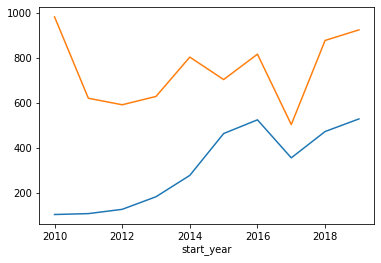

In [33]:
#построим график выхода премьер по годам.
years_count = data.groupby(by='start_year',).count()
years_count['box_office'].plot()
years_count['title'].plot()

Как можно видеть из графика, количество кинотеатральных премьер росло год от года со 100 до 550 с проседанием в 2017.
по общему количеству вылданных прокатных удостоверений ситуация несколько иная, есть большой спад с 1000 в 2010 до 600 в 2011
далее есть небольшое проседание в 2015 и сильное падение в 2017 году, как и в  2017, это характерно и для кинопроката и проката в общем

<AxesSubplot:xlabel='start_year'>

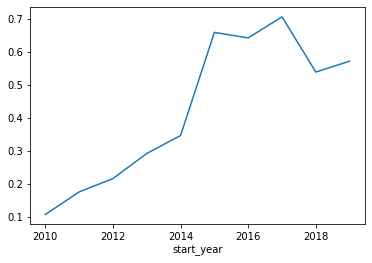

In [34]:
#проанализируем долю фильмов выходивших в кинопрокат ото всех
years_count['delta'] = years_count['box_office'] / years_count['title']
years_count['delta'].plot()

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:xlabel='start_year'>

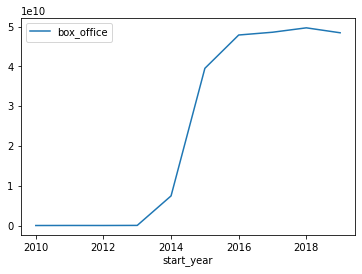

In [35]:
#датой начала сбора данных о бокс офисе можем посчитать 2014 год, сумма сборов очень сильно меняется от 1 миллиарда рубей в 14 до 5 в 2018 году
data.pivot_table(index='start_year', values='box_office', aggfunc='sum').plot()

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,mean,median
start_year,,
2010,23130,1700
2011,129383,3000
2012,54339,5660
2013,161954,3522
2014,26684415,18160
2015,84940570,4920933
2016,91000569,3846679
2017,136032793,9968340
2018,104785573,8911533


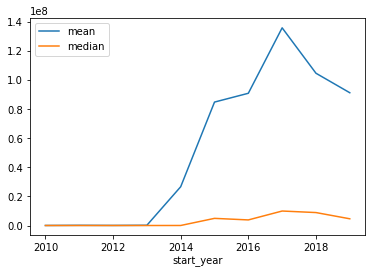

In [36]:
#очень большой и очень ничего не говорящий нам разброс. есть хорошие фильмы, есть плохие
box_office_by_year = data[data.box_office.notna()].pivot_table(
    index='start_year', values='box_office', aggfunc=('mean', 'median')
)
box_office_by_year['median'] = box_office_by_year['median'].astype('int')
box_office_by_year['mean'] = box_office_by_year['mean'].astype('int')
box_office_by_year.plot()
box_office_by_year

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

на графике видно, что основная прибыль идет от фильмов 16+, полагаю что это связано с тем, что на нее идет основная масса платящей аудитории, которая в основном посещает кинотеатры по собственному желанию, дети до 14 лет не располагают возможностью самостоятельно пойти в кино и не имеют собственных средств

([<matplotlib.axis.XTick at 0x7f3922b40310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

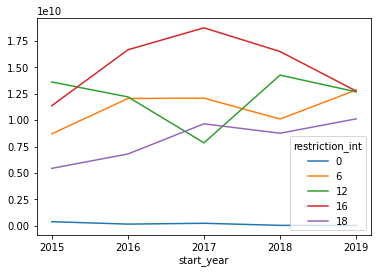

In [37]:
#проанализируем сборы год к к году в зависимости от возрастной категории. 
year_pivot = data.query('start_year >= 2015').pivot_table(index='start_year', columns='restriction_int', values='box_office', aggfunc='sum')
year_pivot=year_pivot.astype('int')
year_pivot.plot()
plt.xticks(np.arange(2015, 2020, 1))

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [38]:
films_supported = data[data.budget.notna()]
films_supported.summary_support.sum()

20200688312.0

In [39]:
films_supported.groupby(by='main_director')['nonrefundable_support'].sum().sort_values(ascending=False).head(20)

main_director
ф.бондарчук      650000000.0
н.хомерики       540000000.0
а.мегердичев     400000000.0
а.кравчук        400000000.0
н.лебедев        392104482.0
а.мизгирев       300000000.0
р.давлетьяров    287000000.0
к.шипенко        287000000.0
в.тодоровский    270000000.0
п.лунгин         263000000.0
д.козловский     260000000.0
с.андреасян      260000000.0
д.тюрин          251000000.0
ф.дмитриев       250000000.0
и.шурховецкий    250000000.0
и.джендубаев     250000000.0
р.прыгунов       215000000.0
а.учитель        190000000.0
д.дьяченко       180000000.0
д.киселев        175000000.0
Name: nonrefundable_support, dtype: float64

In [40]:
films_supported.groupby(by='main_director')['refundable_support'].sum().sort_values(ascending=False).head(20)

main_director
о.степченко       180000000.0
д.дьяченко        171000000.0
а.мизгирев        150000000.0
н.хомерики        120000000.0
к.бронзит         115000000.0
а.учитель         110000000.0
ю.васильев        110000000.0
ф.бондарчук       100000000.0
а.кравчук         100000000.0
и.шурховецкий     100000000.0
д.шмидт,          100000000.0
а.цицилин          90000000.0
в.бедошвили,       80000000.0
д.киселев          75000000.0
т.бекмамбетов,     75000000.0
с.андреасян        65000000.0
р.давлетьяров      65000000.0
а.сидоров          60000000.0
н.лопато,          60000000.0
а.цицилин,         60000000.0
Name: refundable_support, dtype: float64

In [41]:
films_supported.groupby(by='main_genre')['refundable_support'].sum().sort_values(ascending=False).head(20)

main_genre
мультфильм     930000000.0
комедия        796500000.0
драма          628346881.0
приключения    255000000.0
фэнтези        233000000.0
история        200000000.0
фантастика     190000000.0
мюзикл         152153119.0
триллер        130000000.0
ужасы          111000000.0
детектив        55000000.0
семейный        41000000.0
военный         40000000.0
боевик          29000000.0
реальное тв     28000000.0
криминал        25000000.0
мелодрама       25000000.0
детский                0.0
спорт                  0.0
биография              0.0
Name: refundable_support, dtype: float64

In [42]:
films_supported[films_supported['refundable_support'] != 0].groupby(by='main_genre')['refundable_support'].count().sort_values(ascending=False).head(20)

main_genre
комедия        28
мультфильм     21
драма          17
триллер         7
ужасы           6
фэнтези         5
мюзикл          4
криминал        3
фантастика      3
военный         2
приключения     2
семейный        2
история         2
детектив        2
боевик          2
мелодрама       1
реальное тв     1
Name: refundable_support, dtype: int64

In [43]:
films_supported.groupby(by='main_genre')['nonrefundable_support'].sum().sort_values(ascending=False).head(20)

main_genre
драма          4.686060e+09
комедия        2.421783e+09
мультфильм     1.531520e+09
фантастика     1.216000e+09
история        8.200000e+08
фэнтези        7.999000e+08
триллер        6.396453e+08
спорт          4.550000e+08
приключения    4.410000e+08
детектив       4.300000e+08
военный        3.820009e+08
мелодрама      3.730000e+08
боевик         3.050000e+08
семейный       2.980000e+08
криминал       2.550000e+08
ужасы          2.440000e+08
детский        1.190000e+08
биография      1.125100e+08
мюзикл         8.830000e+07
реальное тв    2.500000e+07
Name: nonrefundable_support, dtype: float64

In [44]:
films_supported[films_supported['nonrefundable_support'] != 0].groupby(by='main_genre')['nonrefundable_support'].count().sort_values(ascending=False).head(20)

main_genre
драма          93
комедия        71
мультфильм     27
триллер        15
мелодрама      14
фантастика     11
фэнтези        11
ужасы           9
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
история         4
детский         4
мюзикл          4
криминал        3
спорт           3
биография       3
реальное тв     1
Name: nonrefundable_support, dtype: int64

обьем выделяемых невозвратных средств гораздо больше чем обьем возвратных.

невозвратные деньги выделяются на более серьезные и "патриотические" проекты и более именитым режиссерам на более серьезные темы.
количество проектов с невозвратными инвестициями также в разы выше полагаю это связано со слабой развитостью кино в РОссии в целом как индустрии и отсуствии крупных рекламодателей

возвратные же наоборот на те что могут потенциально собрать кассу.
суммарно на поддержку выделено около 20 миллиардов рублей, из них невозвратные 16 миллиардов рублей

count    314.000000
mean       6.000637
std        1.123948
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

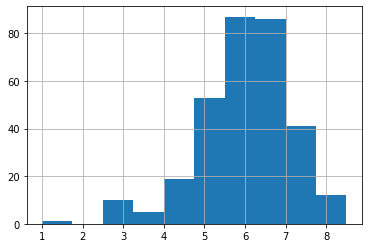

In [45]:
#у большинства фильмов рейтинги от 5,3 до 6.7
films_supported['ratings'].hist()
films_supported.ratings.describe()

21912821262.78

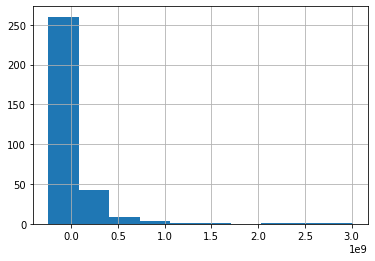

In [46]:
#фильмы не достигают коммерческого успеха в кино в большинстве случаев, успешны единицы
(films_supported['box_office'] - films_supported['summary_support']).hist()
(films_supported['box_office'] - films_supported['summary_support']).describe()
films_supported['box_office'].sum() - films_supported['summary_support'].sum()

In [47]:
(films_supported['box_office'] - films_supported['summary_support']).describe()

count    3.180000e+02
mean     7.170548e+07
std      3.068385e+08
min     -2.441231e+08
25%     -2.962060e+07
50%     -1.939238e+07
75%      4.634792e+07
max      3.013569e+09
dtype: float64

### Шаг 5. Напишите общий вывод

Мы провели обработали 2 датасета, с сайта минкульта и данных о прокате, были выявлены и удалены значения, которые необходимо было удалить из исследования, были убраны фильмы, рейтинг которых неизвестен, а также фильмы не имеющие прокатного удостоверения, все данные приведены к единому формату, определены главный режиссер и основной жанр фильма.

Мы выявили, что наибольшее количество фильмов в кинопрокате было в 2016 и 2019 годах
Среднестатистический кинофильм собирает небольшую кассу, больше всех денег собирают фильмы с ограничением в 16+, есть тренд на сижение популярности фильмов с данным возрастным рейтингом и ростом фильмов 6+ и 12+.


Киноиндустрия в России удел энтузиастов, не смотря на яркие успешные проекты в стриминге, фильмы спонсируемые государством коммерчески неуспешны и не приносят желаемых результатов. Основной тип поддержки это поддержка без возврата инвестиций. наиболее популярный жанр драма. питчатся на невозвратную поддержку чаще именитые режиссеры или именитые идеи(легенда номер 17б движение вверх и т д), общий обьем поддержки составил 20 миллиардов рублей, из которых 16 невозвратные. средний рейтинг фильмов составляет от 5,3 до 6,7. суммарная прибыль фильмов с господдержкой составила 21 миллиард р.